## Projeto de Machine Learning Sigmund

In [1]:
from IPython.display import Image
Image(url = 'images/processo.png')

## Etapas do Projeto:

#### Pré processamento:
* **Validação da Base**: Verificar se as classificações estão corretas.
* **Transformação das Variáveis:** transformar a classificação que esta no tipo string para inteiro utilizando a seguinte ordem: {1: 'Analista', 2: 'Comunidador', 3: 'Planejador', 4: 'Executor'}
* **Balanceamento dos Dados:** Em problemas de classificação pode ser necessário balancear as classes. Classes desbalanceadas (ou seja, volume maior de um dos tipos das classes) são comuns e precisam ser tratadas durante a fase de pré-processamento, assim evita o algoritmo aprender mais sobre uma classificação.
* **Feature Selection:** Onde selecionamos os atributos que serão melhores candidatos a variáveis preditoras. O *Feature Selection* nos ajuda a reduzir o overfiting (quando o algoritmo aprende mais que o necessario), aumenta a acuracia do modelo e reduz o tempo de treinamento. Por isto, vamos testar dois metodos de *Feature Selection* a **Eliminação Recursiva** e **Metodo Ensemble** para a seleção destas variaveis.

#### Aprendizado e Avaliação:
* **Métricas de Performance:** Pesquisar a melhor metrica de performance para algoritmos de clusterização;
* **Cross-Validation:** Com está tecnica dividiremos os dados em partes normalmente chamadas de **k-folds**(por exemplo k=5 ou k=10), sendo que cada fold é usado no treinamento de forma repetida, um fold por vez. Após executar o processo, podemos então sumarizar a performance em cada fold usando a média e o seu desvio padrão. A chave deste processo está em definir o valor correto de **k**, de modo que o número de folds represente adequadamente o número de repetições necessarias;
* **Seleção do Modelo:** Com base ao problema proposto neste projeto vamos testar qual o melhor algortimo de clusterização tendo como base a melhor métrica de performance;
* **Otimização:** Todos os algoritmos de ML são parametrizados, por isto, devemos encontrar a melhor combinação entre os parametros em cada algoritmo. Esse processo também é chamado de Otimização de Hyperparametros, neste projeto iremos utilizar o Grid Search Parameter Tuning;

#### Previsão:
* Realizar teste com nova base.

In [2]:
from IPython.display import Image
Image(url = 'images/cross-validation.jpg')

## Inicio do Processo

##### Análise exploratoria, Validação e Transformação de Variáveis

In [125]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
base = pd.read_excel('coleta_dados.xlsx')

In [7]:
#Corrigir classificação. Pois durante a coleta de dados a classificação não foi executada corretamente.
base['classificacao'].unique()

array(['Executor', 'Comunicador', 'Analista'], dtype=object)

In [32]:
resultQuest = {}
classification = []
for i in range(0,len(base)):
    quest = list(base.iloc[i,:])
    
    resultQuest[1] = quest.count(1)*4
    resultQuest[2] = quest.count(2)*4
    resultQuest[3] = quest.count(3)*4
    resultQuest[4] = quest.count(4)*4
    
    classification.append(max(resultQuest.items(), key=operator.itemgetter(1))[0])
base['classificacao'] = classification
#Salvando base corrigida
base.to_excel('AvaliacaoDisc.xlsx', index=False)

##### Balanceando os dados

In [100]:
#importando nova base
base = pd.read_excel('AvaliacaoDisc.xlsx')

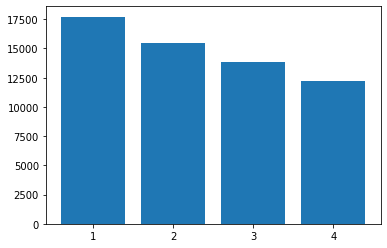

In [101]:
x = base.groupby('classificacao').size().index

plt.bar(x, base.groupby('classificacao').size())
plt.xticks(x, (1, 2, 3, 4))
plt.show()

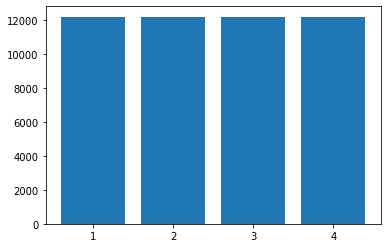

In [102]:
#Balanciamento
qty_total = len(base[base['classificacao'] == 4])

dados = base[base['classificacao']==1].iloc[:qty_total,:]
dados = dados.append(base[base['classificacao']==2].iloc[:qty_total,:], ignore_index=True)
dados = dados.append(base[base['classificacao']==3].iloc[:qty_total,:], ignore_index=True)
dados = dados.append(base[base['classificacao']==4].iloc[:qty_total,:], ignore_index=True)

x = dados.groupby('classificacao').size().index

plt.bar(x, dados.groupby('classificacao').size())
plt.xticks(x, (1, 2, 3, 4))
plt.show()

In [104]:
dados.shape

(48792, 26)

### Feature Selections

##### Método Ensemble

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

Bagged Decision Trees, como o algoritmo RandomForest (esses são chamados de Métodos Ensemble), podem ser usados para estimar a importância de cada atributo. Esse método retorna um score para cada atributo. Quanto maior o score, maior a importância do atributo.

In [369]:
# Import dos Módulos
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

values = dados.values

# Separando o array em componentes de input e output
X = values[:,:25]
Y = values[:,25]

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(X, Y)

# Melhores variaveis
print(dados.columns[:25])
print(modelo.feature_importances_)

Index(['resp1', 'resp2', 'resp3', 'resp4', 'resp5', 'resp6', 'resp7', 'resp8',
       'resp9', 'resp10', 'resp11', 'resp12', 'resp13', 'resp14', 'resp15',
       'resp16', 'resp17', 'resp18', 'resp19', 'resp20', 'resp21', 'resp22',
       'resp23', 'resp24', 'resp25'],
      dtype='object')
[0.03958391 0.04122752 0.03914939 0.03984352 0.03959177 0.04127195
 0.04026121 0.0405679  0.03858931 0.04068279 0.04101238 0.04010423
 0.03791159 0.03927778 0.03989334 0.04065998 0.03980503 0.0398758
 0.04137956 0.04047114 0.04040663 0.04242403 0.04017543 0.03893588
 0.03689793]


In [380]:
dadosFS = dados[dados.columns[np.where(modelo.feature_importances_ >= 0.0404)]]
dadosFS['classificacao'] = dados['classificacao']
dadosFS

,resp2,resp6,resp8,resp10,resp11,resp16,resp19,resp20,resp21,resp22,classificacao
0,1,3,1,3,3,1,2,4,1,2,1
1,1,1,4,1,4,4,3,2,2,1,1
2,1,1,4,4,4,2,4,2,4,2,1
3,3,4,4,3,4,4,2,2,2,2,1
4,1,1,2,1,4,1,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
48787,2,2,4,1,4,3,2,4,4,4,4
48788,1,2,2,3,3,2,4,4,4,4,4
48789,4,2,1,3,1,4,2,4,2,2,4
48790,3,4,3,1,1,3,3,2,4,4,4


In [394]:
resultQuest = {}
classification = []
for i in range(0,len(dadosFS)):
    quest = list(dadosFS.iloc[i,:])
    
    resultQuest[1] = quest.count(1)*4
    resultQuest[2] = quest.count(2)*4
    resultQuest[3] = quest.count(3)*4
    resultQuest[4] = quest.count(4)*4
    
    classification.append(max(resultQuest.items(), key=operator.itemgetter(1))[0])
dadosFS['classificacao1'] = classification
dadosFS

,resp2,resp6,resp8,resp10,resp11,resp16,resp19,resp20,resp21,resp22,classificacao,classificacao1
0,1,3,1,3,3,1,2,4,1,2,1,1
1,1,1,4,1,4,4,3,2,2,1,1,1
2,1,1,4,4,4,2,4,2,4,2,1,4
3,3,4,4,3,4,4,2,2,2,2,1,2
4,1,1,2,1,4,1,2,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48787,2,2,4,1,4,3,2,4,4,4,4,4
48788,1,2,2,3,3,2,4,4,4,4,4,4
48789,4,2,1,3,1,4,2,4,2,2,4,2
48790,3,4,3,1,1,3,3,2,4,4,4,3


In [393]:
(len(dadosFS[dadosFS['classificacao'] != dadosFS['classificacao1']]) / len(dadosFS) - 1)*-100

73.33784226922447